In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# (train_images, train_labels) для обучения, (test_images, test_labels) для теста

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape
# 60000 изображений 28*28 пикселей
# начинаем обучать на этих данных

(60000, 28, 28)

In [3]:
len(train_labels)
# метки уч. набора

60000

In [4]:
test_images.shape
# смотрим что за изображение, метрики, загружаем в модели

(10000, 28, 28)

In [5]:
len(test_labels)

10000

In [6]:
train_labels
# метка число 0-9

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers
network = models.Sequential()
# Первый слой 512 узлов изображение 28*28 в вектор из 784 элемента 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# Второй слой 10 узлов выходной слой
network.add(layers.Dense(10, activation='softmax'))
# return массив из 10 оценок, их сумма =1
# softmax вероятности принадлежности к тому или иному классу цифр

In [9]:
# Оптимайзер как модель обновляется на основе данных, которые она видит, и функции потери
# loss - функция потерь, metrics для контроля обучения и тестирования
network.compile(optimizer='rmsprop',
 loss='categorical_crossentropy', # в задачах классификации лучше использовать категориальную кроссэнтропию
 metrics=['accuracy'])

In [10]:
# обработка данных: стандартизация вектора избражения в вектор из 0 и 1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255  

In [12]:
from tensorflow.keras.utils import to_categorical
# Преобразование метки целочисленной категории в кодировку onehot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# обучение модели батч = 128 картинок
network.fit(train_images, train_labels, epochs=5, batch_size=128) 
# точность 98%
print("Модель успешно обучена")
network.save('mnist.h5')
print("Модель сохранена как mnist.h5")

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2589 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1031 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0675 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0373 - accuracy: 0.9889
Модель успешно обучена
Модель сохранена как mnist.h5


In [14]:
# оценка точности: вычисляет значение критерия качества и метрики
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9803000092506409
test_loss: 0.064906544983387


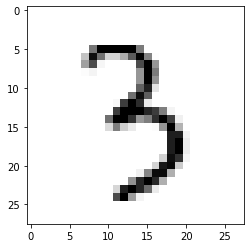

In [15]:
digit = test_images[205]
import matplotlib.pyplot as plt
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

1/1 [==============================] - 0s 79ms/step
[[6.7607910e-09 2.0106629e-06 9.0112468e-07 9.9970657e-01 3.0005283e-06
  2.1743042e-04 2.2661240e-09 1.9924453e-06 4.1694078e-05 2.6366539e-05]]


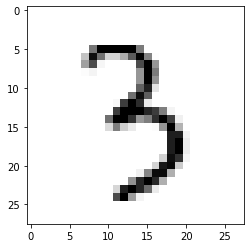

3


In [16]:
import numpy as np
n = 205
x = np.expand_dims(test_images[n], axis=0)
res = network.predict(x)
print(res)
plt.imshow(test_images[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print( np.argmax(res) )
# проводим проверку на изображении

In [17]:
pred = network.predict(test_images)
pred = np.argmax(pred, axis=1)
 
print(pred.shape)
 
print(pred[:20])
test_lab2 = np.argmax(test_labels, axis=1)
print(test_lab2[:20])

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [18]:
mask = pred == test_lab2
print(mask[:20])
 
x_false = test_images[~mask]
y_false = test_images[~mask]
 
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
(197, 784)


Значение сети: 7


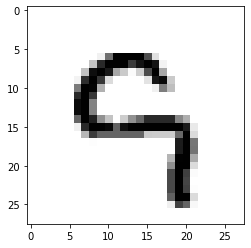

Значение сети: 2


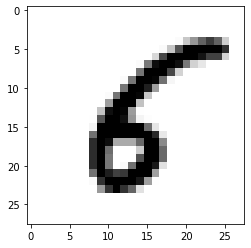

Значение сети: 1


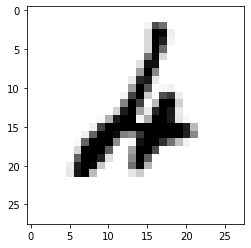

Значение сети: 0


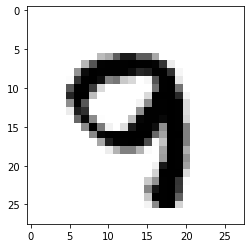

Значение сети: 4


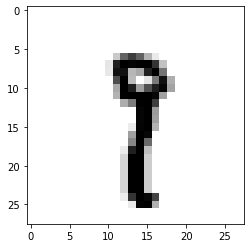

In [19]:
for i in range(5):
  print("Значение сети: "+str(test_lab2[i]))
  plt.imshow(x_false[i].reshape(28, 28), cmap=plt.cm.binary)
  plt.show()
  # берем цифры, которые не точно определяются и считаем для них